# Thera Bank Personal Loan Campaign

##### Elige Grant
##### February 2021

## Data Description:

The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

## Domain:

Banking

## Context:

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

## Attribute Information:

* ID: Customer ID
* Age: Customer's age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (x1000 Dollars)
* ZIP Code: Home Address ZIP
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month (x1000 Dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (x1000 Dollars)
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?

## Learning Outcomes:

* Exploratory Data Analysis
* Preparing the data to train a model
* Training and making predictions using a classification model
* Model evaluation

## Steps and Tasks:

### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# SciKit Learn Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_selection import RFE

# StatsModels Libraries
import statsmodels.api as sm

In [2]:
# Load the data into pandas dataframe
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
# Check number of rows and columns
data.shape

(5000, 14)

In [4]:
# Have a look at the column names
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
# Head & Tails on DataFrame
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [6]:
# Check column types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
# Check the unique values in each column of the dataframe.
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [8]:
#A quick summary of the data columns
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


##### Observations:

* Age
 * Min/Max/Avg age is 23/67/45 years old
* Experience
 * Min/Max/Avg experience is -3/20/43 years
 * Probably should range between 0 and 43 years
 * There appears to be a negative value for "Experience" - need to correct?
* Income
 * Min/Max/Avg annual income is 8K/73K/224K dollars
* Zip code
 * 467 unique zip codes
* Family size
 * Avg. of 2 people in family per account
* Credit card spending per month
 * Min/Max/Avg spending of 0/2K/10K per month
* Education
 * All three possible education types appear to be represented in the data (no missing values)
* Mortgage
 * Max is 635K dollars
* Personal loan (1 = Yes/0 = No)
 * Most people (~90%) did not accept the personal loan with the bank
* Securities Account (1 = Yes/0 = No)
 * Most people (~90%) do not have a securities account with the bank
* CD Account (1 = Yes/0 = No)
 * Most people (~94%) do not have a CD account with the bank
* Online Banking (1 = Yes/0 = No)
 * Most people (~60%) use the bank's online banking services
* Credit card (1 = Yes/0 = No)
 * Most people (~70%) do not have a credit card with the bank

### 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

* Number of unique in each column?
* Number of people with zero mortgage?
* Number of people with zero credit card spending per month?
* Value counts of all categorical columns.
* Univariate and Bivariate
* Get data model ready

### Number of unique in each column?

In [9]:
# Check the unique values in each column of the dataframe.
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### Number of people with zero mortgage?

In [10]:
# Number of people with zero mortgage
sum(data.apply(lambda x : 1 if x['Mortgage'] == 0.0 else 0, axis = 1))

3462

* 3462 Customers that do not have a mortgage

### Number of people with zero credit card spending per month?

In [11]:
# Number of people with zero credit card spending every month
sum(data.apply(lambda x : 1 if x['CCAvg'] == 0.0 else 0, axis = 1))

106

* 106 Customers that do not have any credit card spending

### Value counts of all categorical columns.

In [12]:
# Value counts for # of people in each ZIP Code
# May need to drop erroneous first ZIP code (assuming it is wrong)
data.groupby(by='ZIP Code').agg('count')['ID']

ZIP Code
9307     1
90005    5
90007    6
90009    8
90011    3
        ..
96091    4
96094    2
96145    1
96150    4
96651    6
Name: ID, Length: 467, dtype: int64

In [13]:
# Value counts for # of people in Family
data.groupby(by='Family').agg('count')['ID']

Family
1    1472
2    1296
3    1010
4    1222
Name: ID, dtype: int64

In [14]:
# Value counts for Education type
data.groupby(by='Education').agg('count')['ID']

Education
1    2096
2    1403
3    1501
Name: ID, dtype: int64

In [15]:
# Value counts for # of people accepting Personal Loan
data.groupby(by='Personal Loan').agg('count')['ID']

Personal Loan
0    4520
1     480
Name: ID, dtype: int64

In [16]:
# Value counts for # of people with a Securities Account with Bank
data.groupby(by='Securities Account').agg('count')['ID']

Securities Account
0    4478
1     522
Name: ID, dtype: int64

In [17]:
# Value counts for # of people with a CD Account with Bank
data.groupby(by='CD Account').agg('count')['ID']

CD Account
0    4698
1     302
Name: ID, dtype: int64

In [18]:
# Value counts for # of people using Online Banking services with Bank
data.groupby(by='Online').agg('count')['ID']

Online
0    2016
1    2984
Name: ID, dtype: int64

In [19]:
# Value counts for # of people with a Credit Card issued by Bank
data.groupby(by='CreditCard').agg('count')['ID']

CreditCard
0    3530
1    1470
Name: ID, dtype: int64

### Univariant plots

<AxesSubplot:xlabel='Age', ylabel='count'>

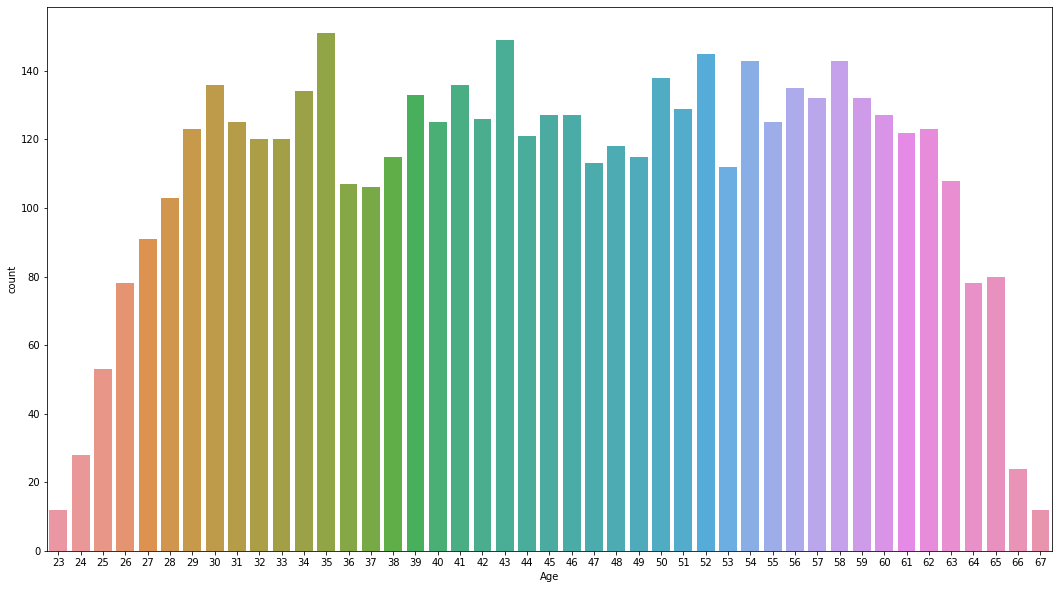

In [20]:
#Age Distribution
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(ax=ax,x=data['Age'])

<AxesSubplot:xlabel='Experience', ylabel='count'>

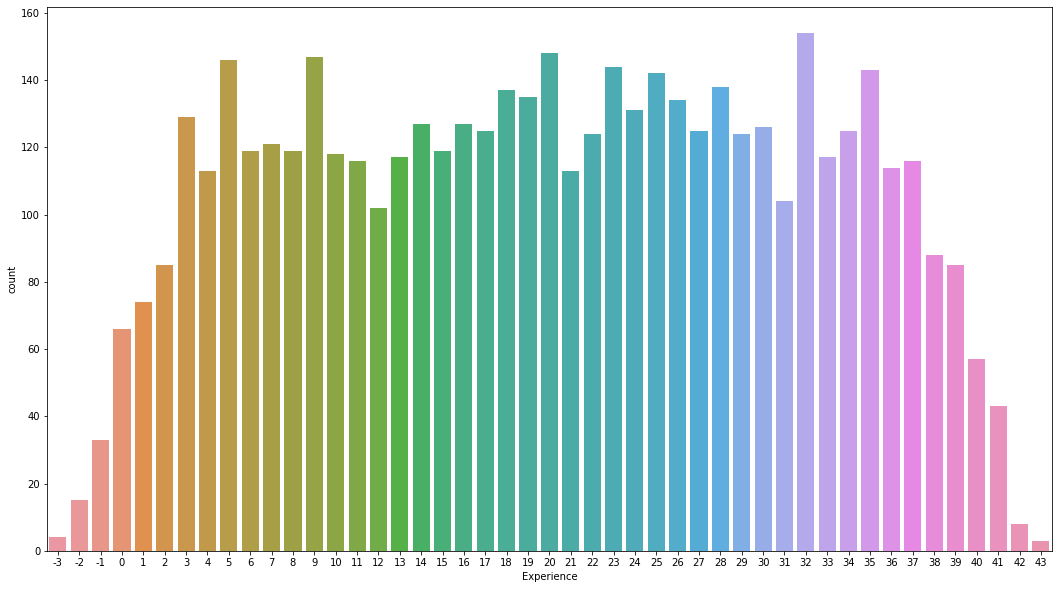

In [21]:
#Experience Distribution
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(ax=ax,x=data['Experience'])

<AxesSubplot:xlabel='Income', ylabel='Count'>

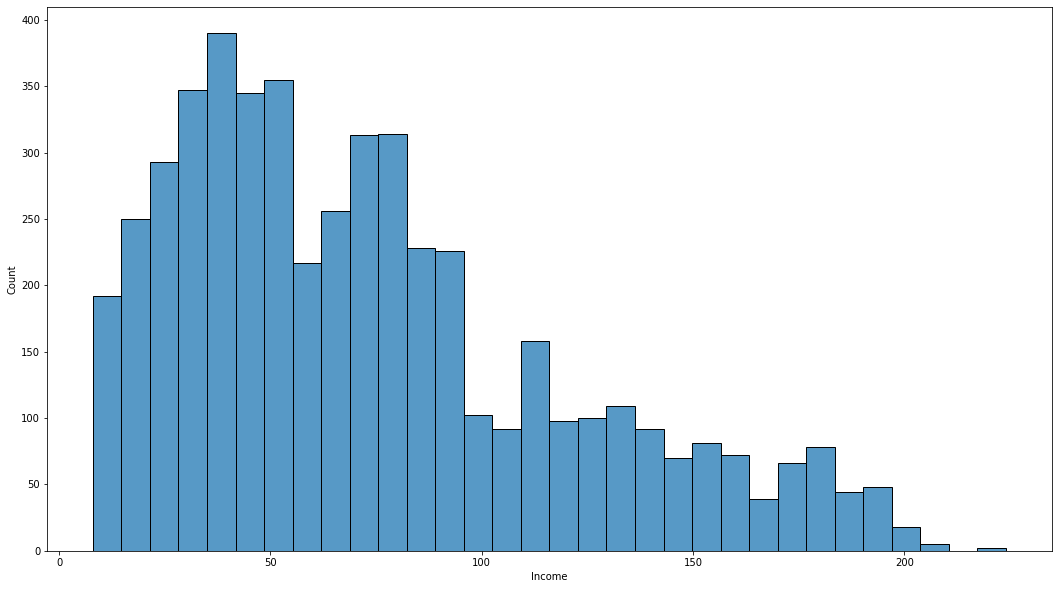

In [22]:
#Income Distribution
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(ax=ax, x=data['Income'])

<AxesSubplot:xlabel='Family', ylabel='count'>

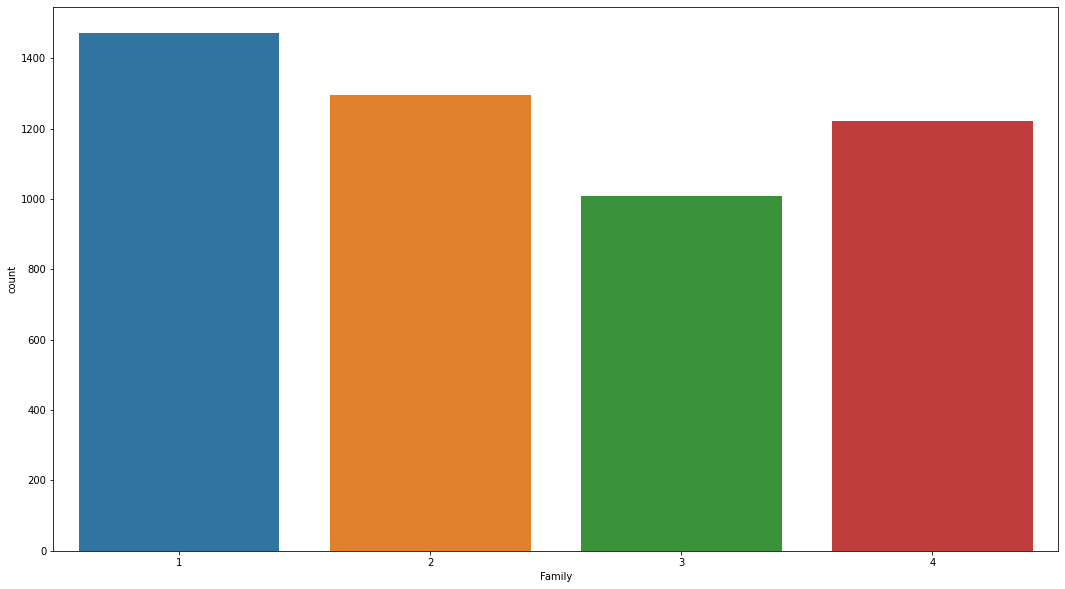

In [23]:
#Family Size Distribution
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(ax=ax,x=data['Family'])

<AxesSubplot:xlabel='CCAvg', ylabel='Count'>

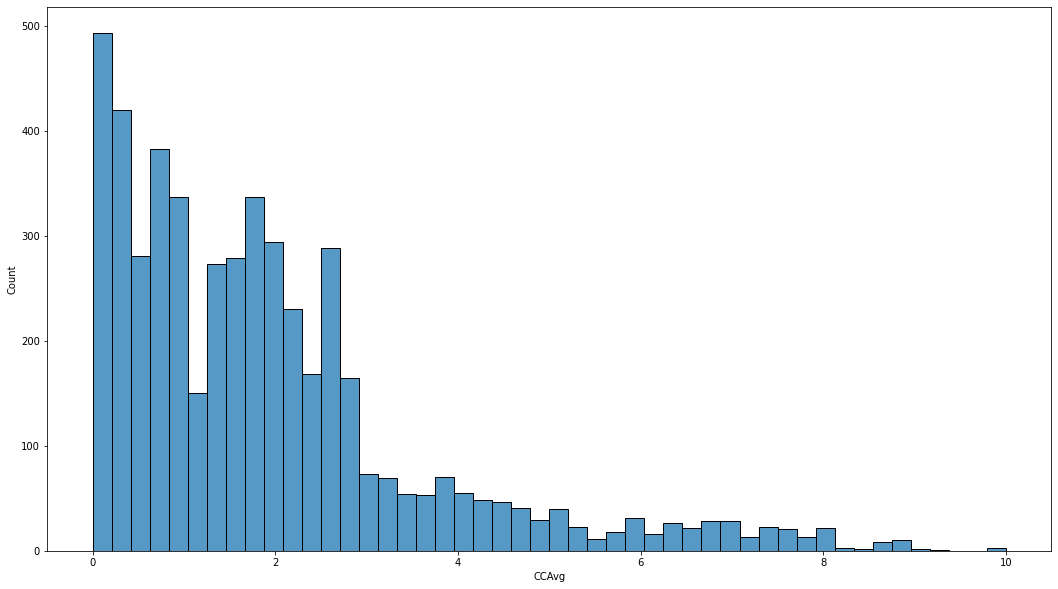

In [24]:
#Credit Card AVG Monthly Usage Distribution
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(ax=ax, x=data['CCAvg'])

<AxesSubplot:xlabel='Education', ylabel='count'>

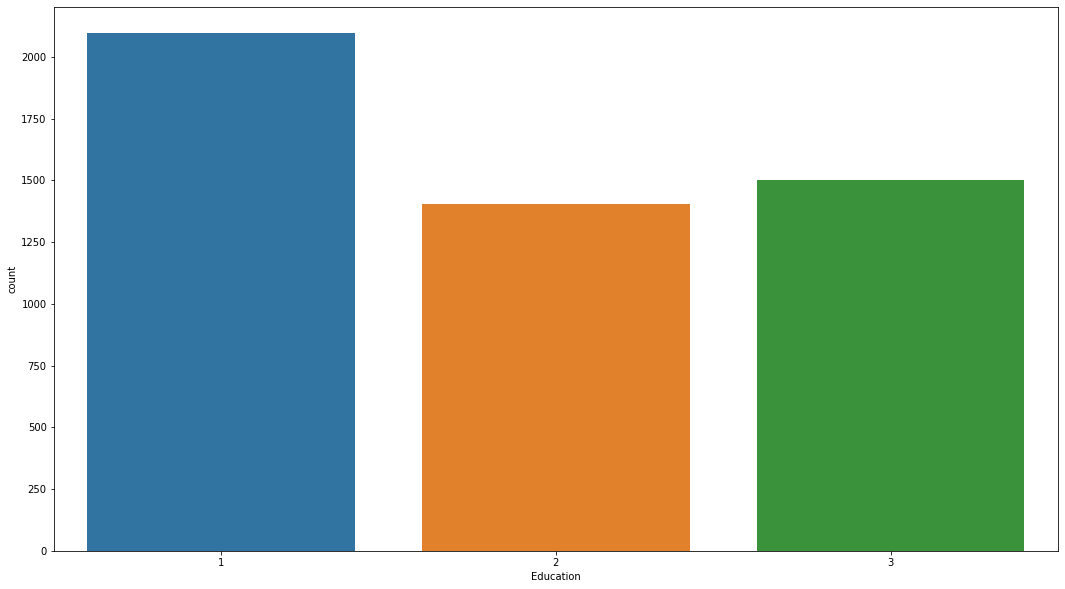

In [25]:
#Education Distribution
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(ax=ax,x=data['Education'])

<AxesSubplot:xlabel='Mortgage', ylabel='Count'>

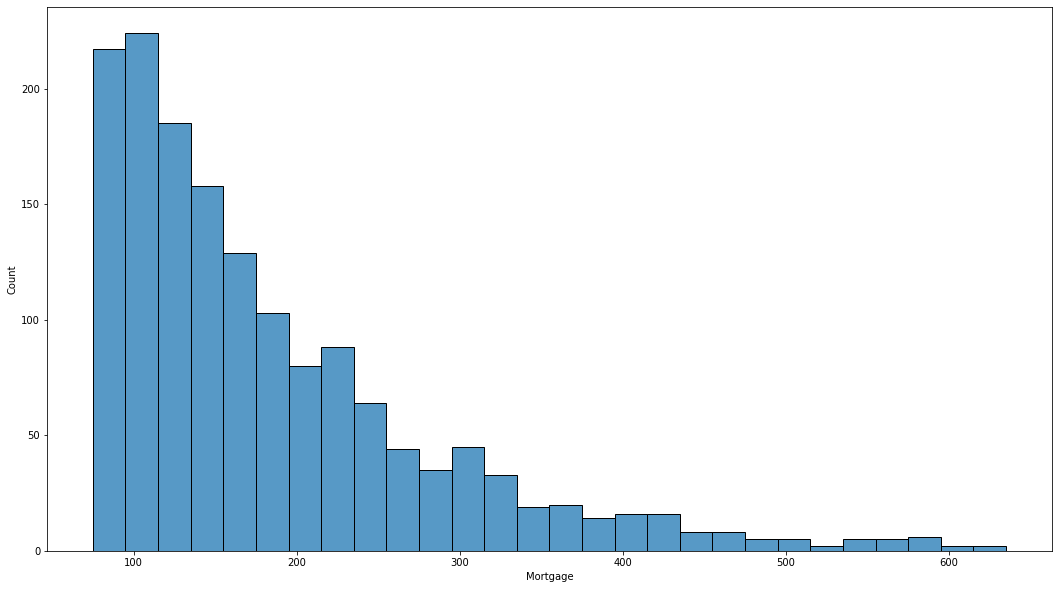

In [26]:
#Mortgage Distrubtion (remove 0 Mortgage first)
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(ax=ax,x=data['Mortgage'][(data.Mortgage > 0.1)])

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

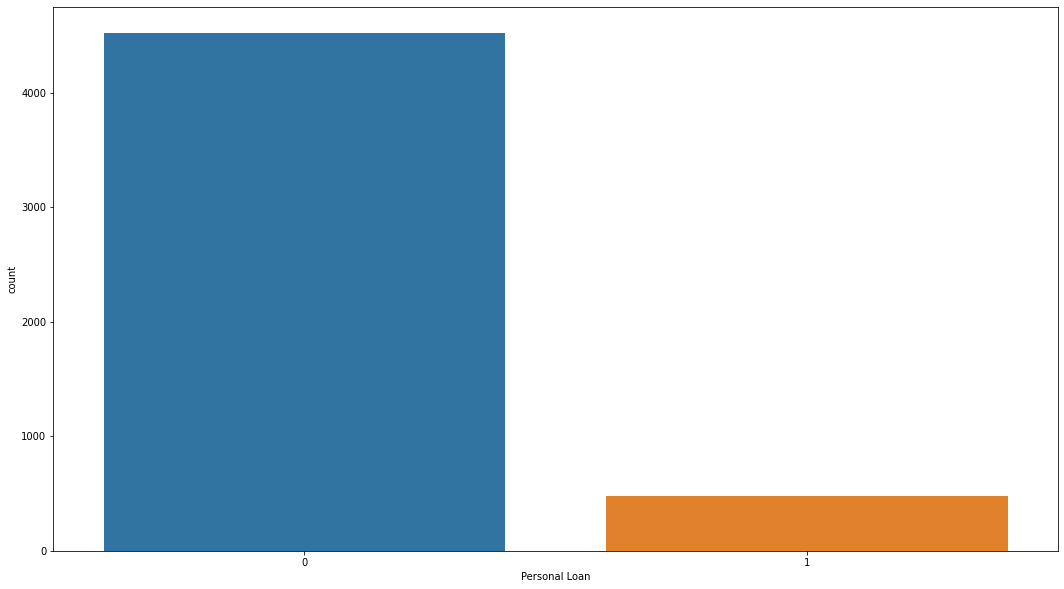

In [27]:
#Accepted Personal Loan with Bank (1 = Yes, 0 = No)
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(ax=ax,x=data['Personal Loan'])

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

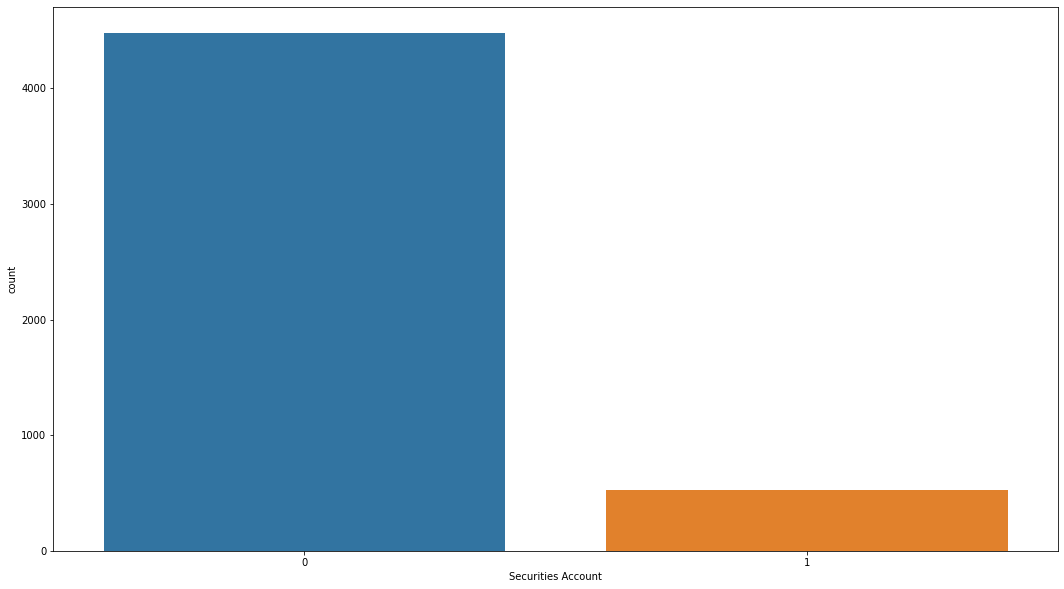

In [28]:
#Has Securities Account with Bank (1 = Yes, 0 = No)
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(ax=ax,x=data['Securities Account'])

<AxesSubplot:xlabel='CD Account', ylabel='count'>

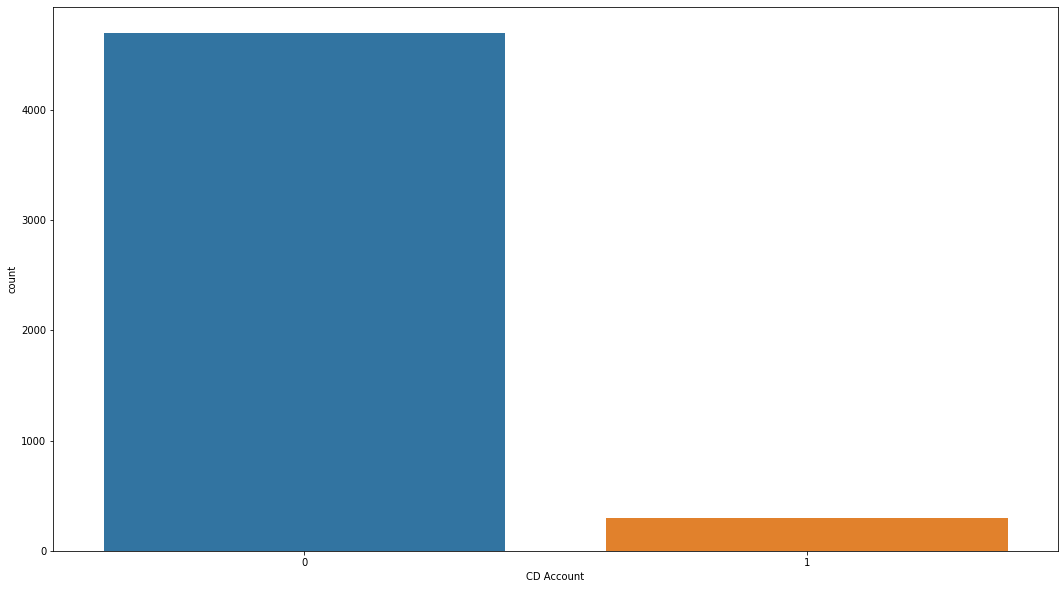

In [29]:
#Has CD Account with Bank (1 = Yes, 0 = No)
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(ax=ax,x=data['CD Account'])

<AxesSubplot:xlabel='Online', ylabel='count'>

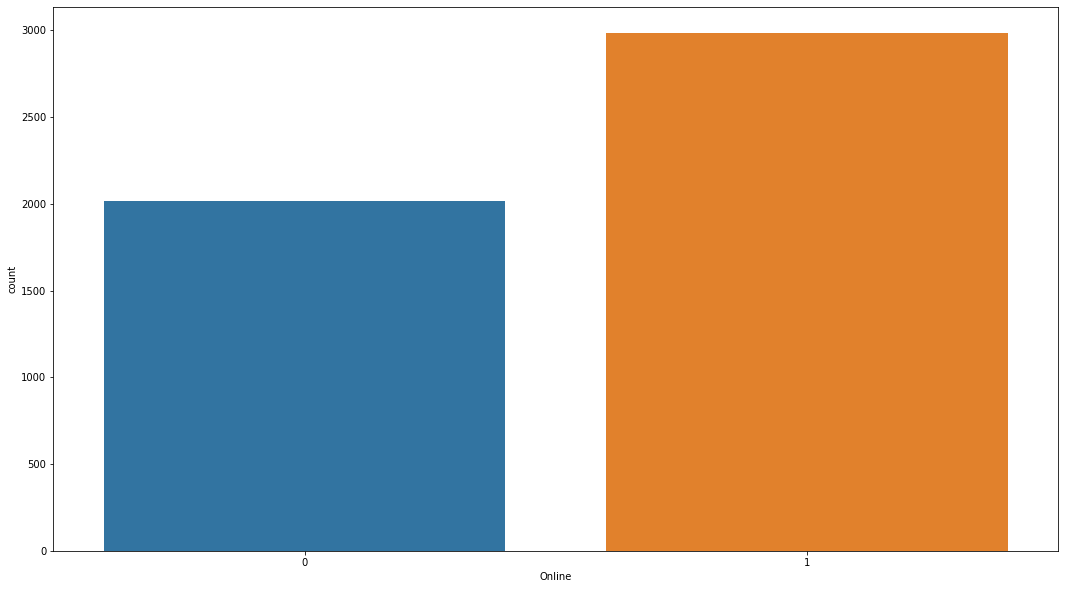

In [30]:
#Uses Online Banking with Bank (1 = Yes, 0 = No)
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(ax=ax,x=data['Online'])

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

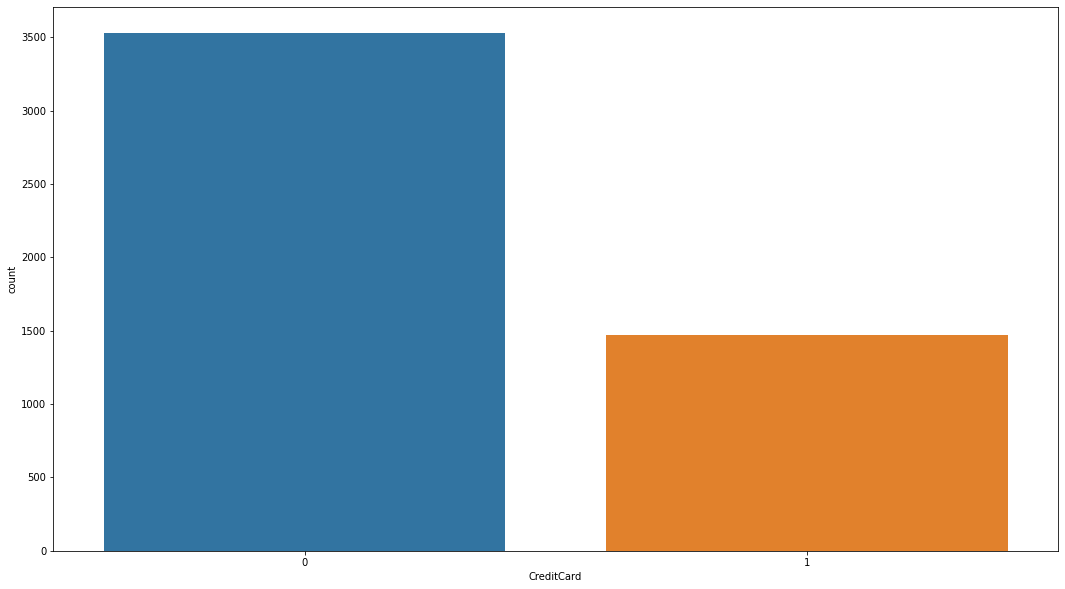

In [31]:
#Has Credit Card with Bank (1 = Yes, 0 = No)
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(ax=ax,x=data['CreditCard'])

### Bi-variant Plots

* Produce scatter plot with 2 variables and color markers with whether a customer acccepted the personal loan
* Use plots to identify likely and unlikely indicators for whether a bank customer accepts a loan

### Potential Indicators of Accepting Personal Loan (if offered)

<AxesSubplot:xlabel='Income', ylabel='CCAvg'>

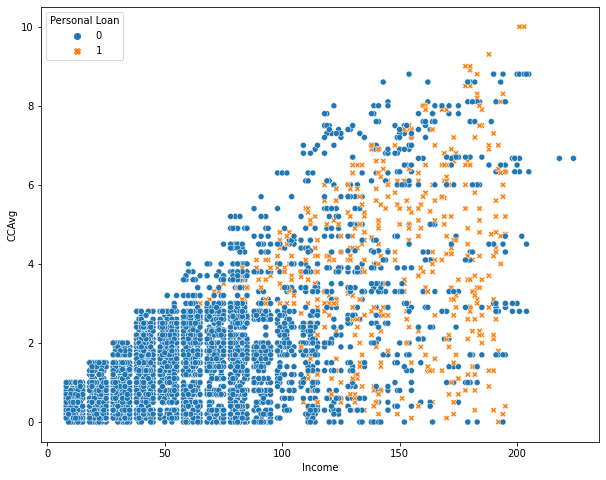

In [32]:
# Income vs. Average Credit Card Spending (Yes/No Accepted Personal Loan)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Income', y='CCAvg',hue='Personal Loan', style='Personal Loan')

<AxesSubplot:xlabel='Income', ylabel='Family'>

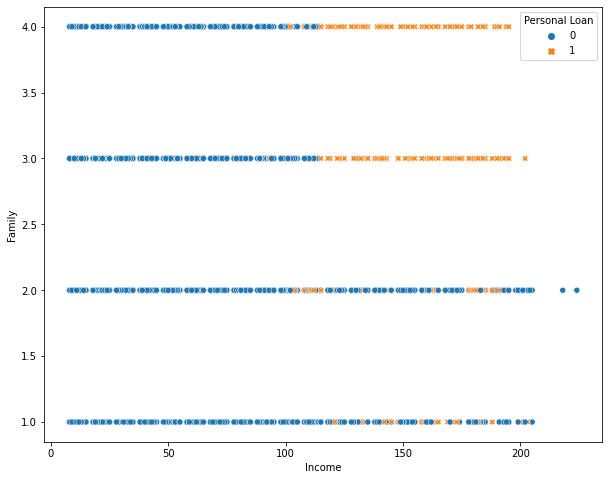

In [33]:
# Income vs. Family Size (Yes/No Accepted Personal Loan)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Income', y='Family',hue='Personal Loan', style='Personal Loan')

<AxesSubplot:xlabel='Income', ylabel='Education'>

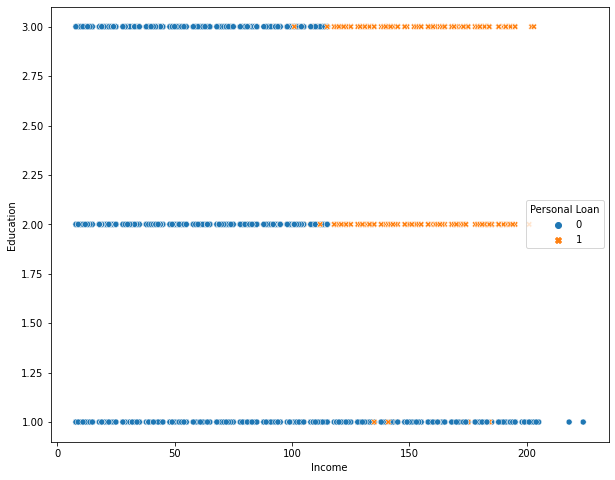

In [34]:
# Income vs. Education (Yes/No Accepted Personal Loan)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Income', y='Education',hue='Personal Loan', style='Personal Loan')

<AxesSubplot:xlabel='Income', ylabel='CD Account'>

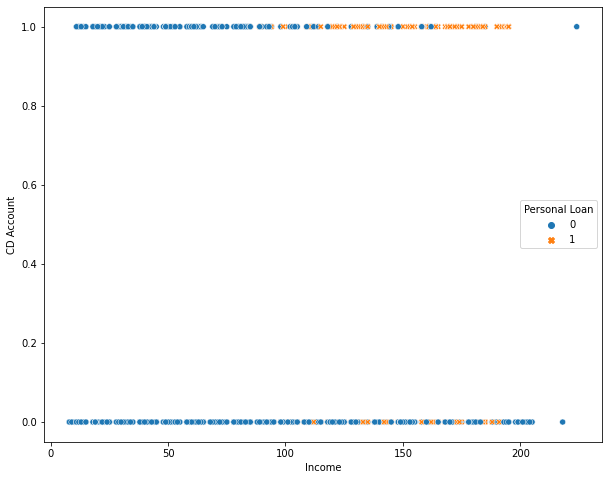

In [35]:
# Income vs. Has CD Account (Yes/No Accepted Personal Loan)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Income', y='CD Account',hue='Personal Loan', style='Personal Loan')

### Not likely to be good indicators of Accepting a Bank Loan (i.e., too mixed)

<AxesSubplot:xlabel='Income', ylabel='Experience'>

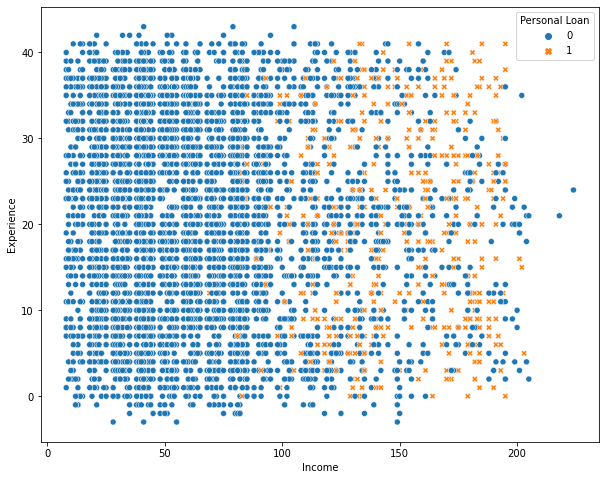

In [36]:
# Income vs. Work Experience (Yes/No Accepted Personal Loan)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Income', y='Experience',hue='Personal Loan', style='Personal Loan')

<AxesSubplot:xlabel='Income', ylabel='Mortgage'>

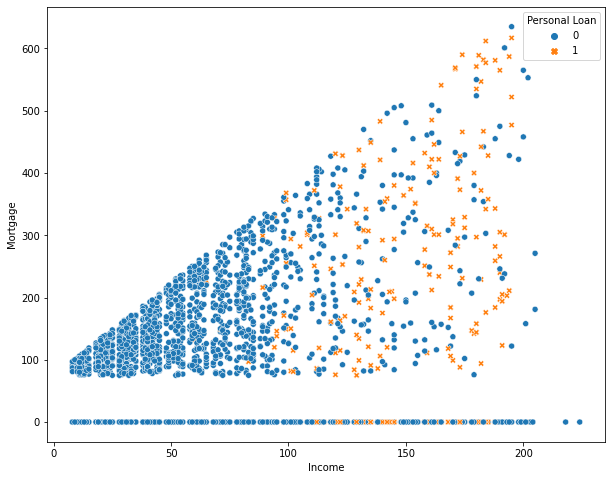

In [37]:
# Income vs. Mortgage (Yes/No Accepted Personal Loan)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Income', y='Mortgage',hue='Personal Loan', style='Personal Loan')

<AxesSubplot:xlabel='Income', ylabel='Securities Account'>

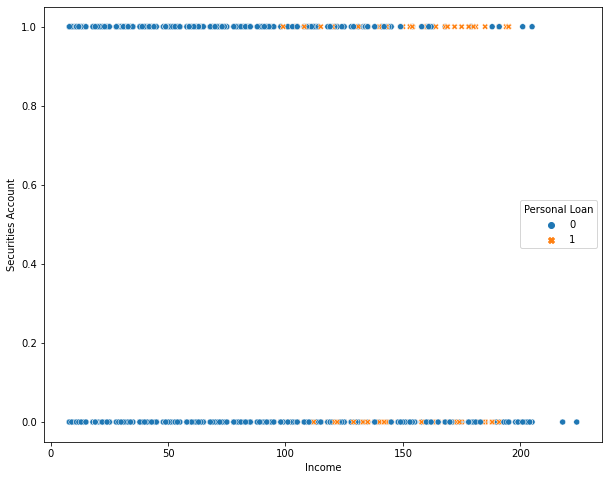

In [38]:
# Income vs. Has Securities Account (Yes/No Accepted Personal Loan)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Income', y='Securities Account',hue='Personal Loan', style='Personal Loan')

<AxesSubplot:xlabel='Income', ylabel='Online'>

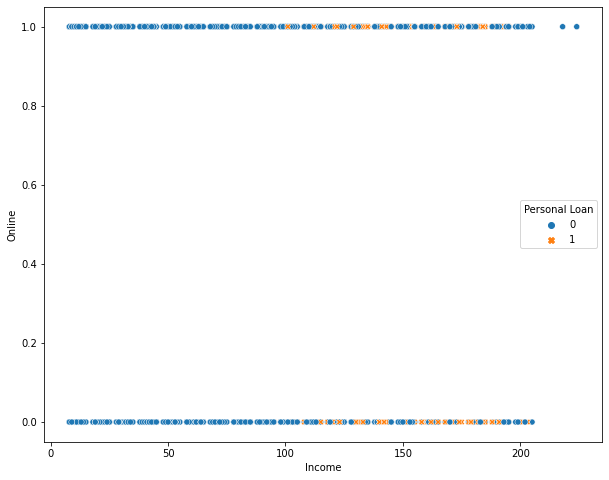

In [39]:
# Income vs. Has Online Banking Account (Yes/No Accepted Personal Loan)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Income', y='Online',hue='Personal Loan', style='Personal Loan')

<AxesSubplot:xlabel='Income', ylabel='CreditCard'>

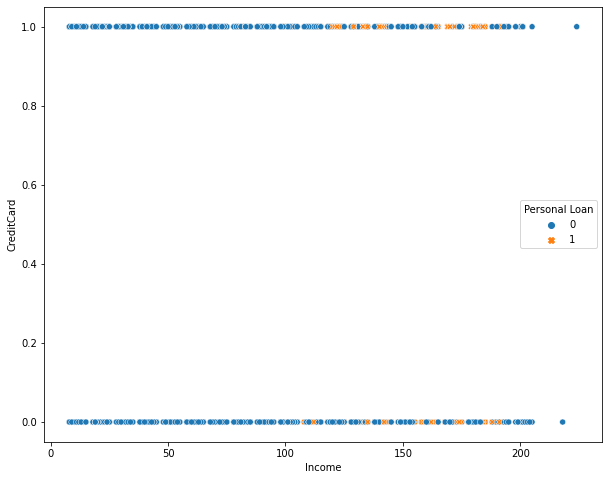

In [40]:
# Income vs. Has Credit Card Account (Yes/No Accepted Personal Loan)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Income', y='CreditCard',hue='Personal Loan', style='Personal Loan')

#### Correlation Check

In [41]:
data[data.columns[:]].corr()['Personal Loan'][:]

ID                   -0.024801
Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

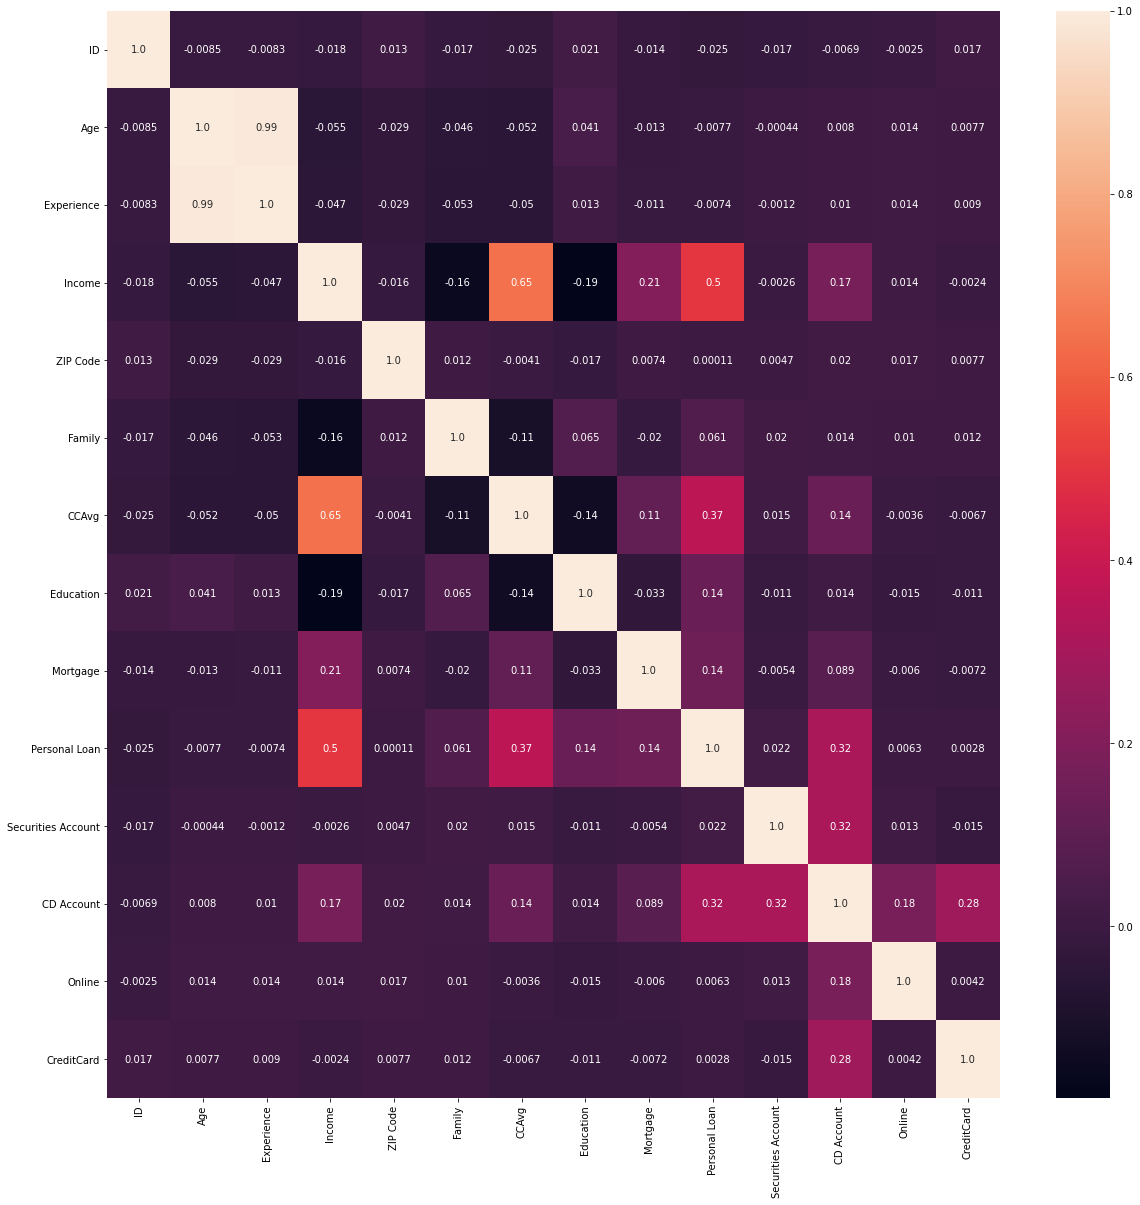

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, fmt=".2")
plt.show()

#### % # of people in each ZIP Code


In [43]:
# Get the total number of people in each ZIP code
temp_count = data.groupby(by='ZIP Code').agg({'ID':'count'})
temp_count

,ID
ZIP Code,
9307,1
90005,5
90007,6
90009,8
90011,3
...,...
96091,4
96094,2
96145,1


In [44]:
# Get the total number of people who accepted the Personal Loan in each ZIP code
temp_sum = data.groupby(by='ZIP Code').agg({'Personal Loan':'sum'})
temp_sum

,Personal Loan
ZIP Code,
9307,0
90005,0
90007,0
90009,0
90011,0
...,...
96091,0
96094,0
96145,0


In [45]:
temp_count.size

467

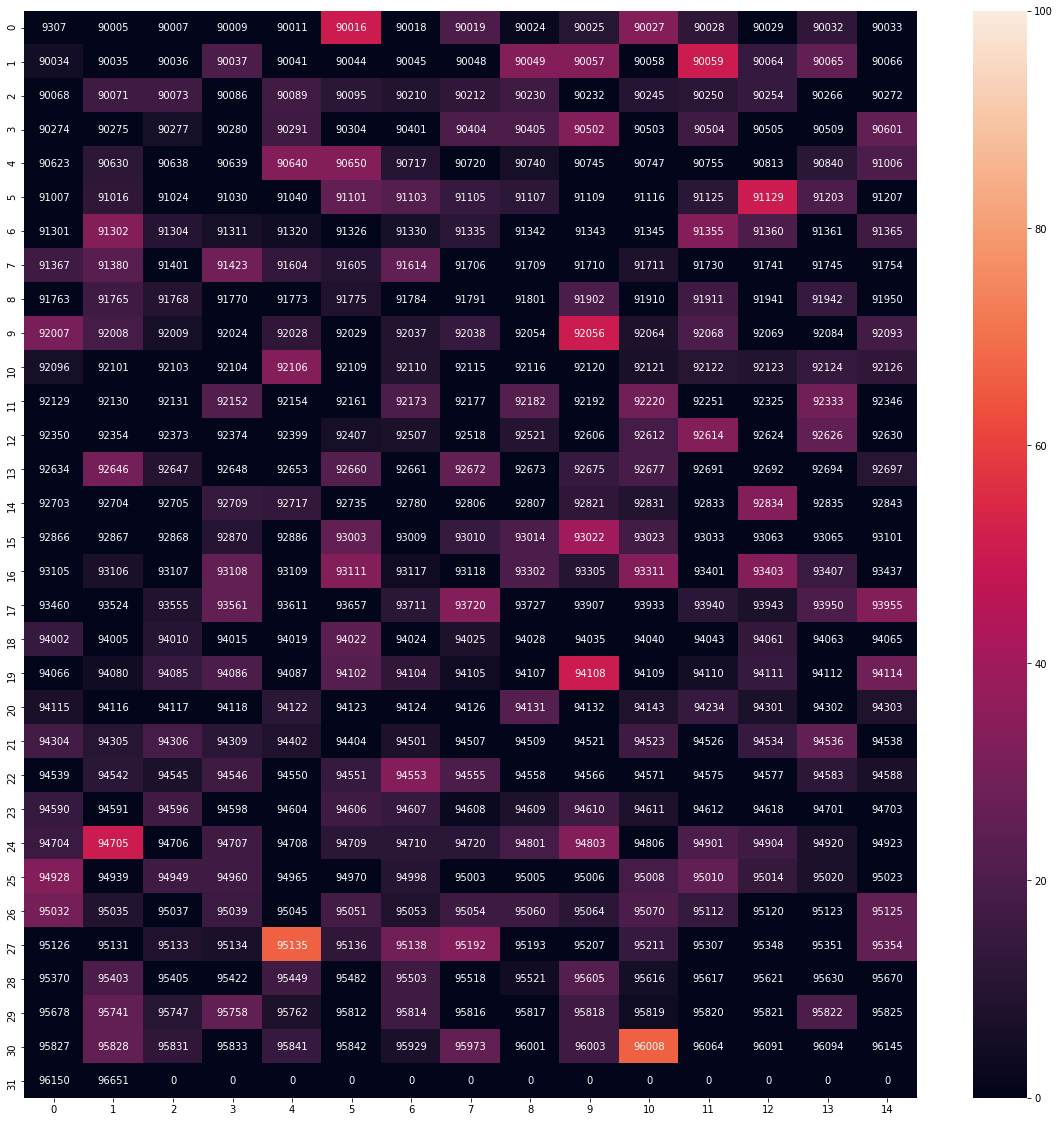

In [46]:
# Display the % of customers in each ZIP code to accept Personal Loan offer
ZIP_Matrix_data = np.zeros((32, 15))
ZIP_Matrix_code = np.zeros((32, 15))
count = 0
for ii in range(0,32):
    for jj in range(0,15):
        ZIP_Matrix_data[ii][jj] = 100.0*temp_sum.values[count]/temp_count.values[count]
        ZIP_Matrix_code[ii][jj] = temp_sum.index[count]
        count += 1
        if count == temp_sum.size:
            break
    if count == temp_sum.size:
        break
        
plt.figure(figsize=(20,20))
sns.heatmap(ZIP_Matrix_data, annot=ZIP_Matrix_code, fmt="g", vmin=0, vmax=100)
plt.show()

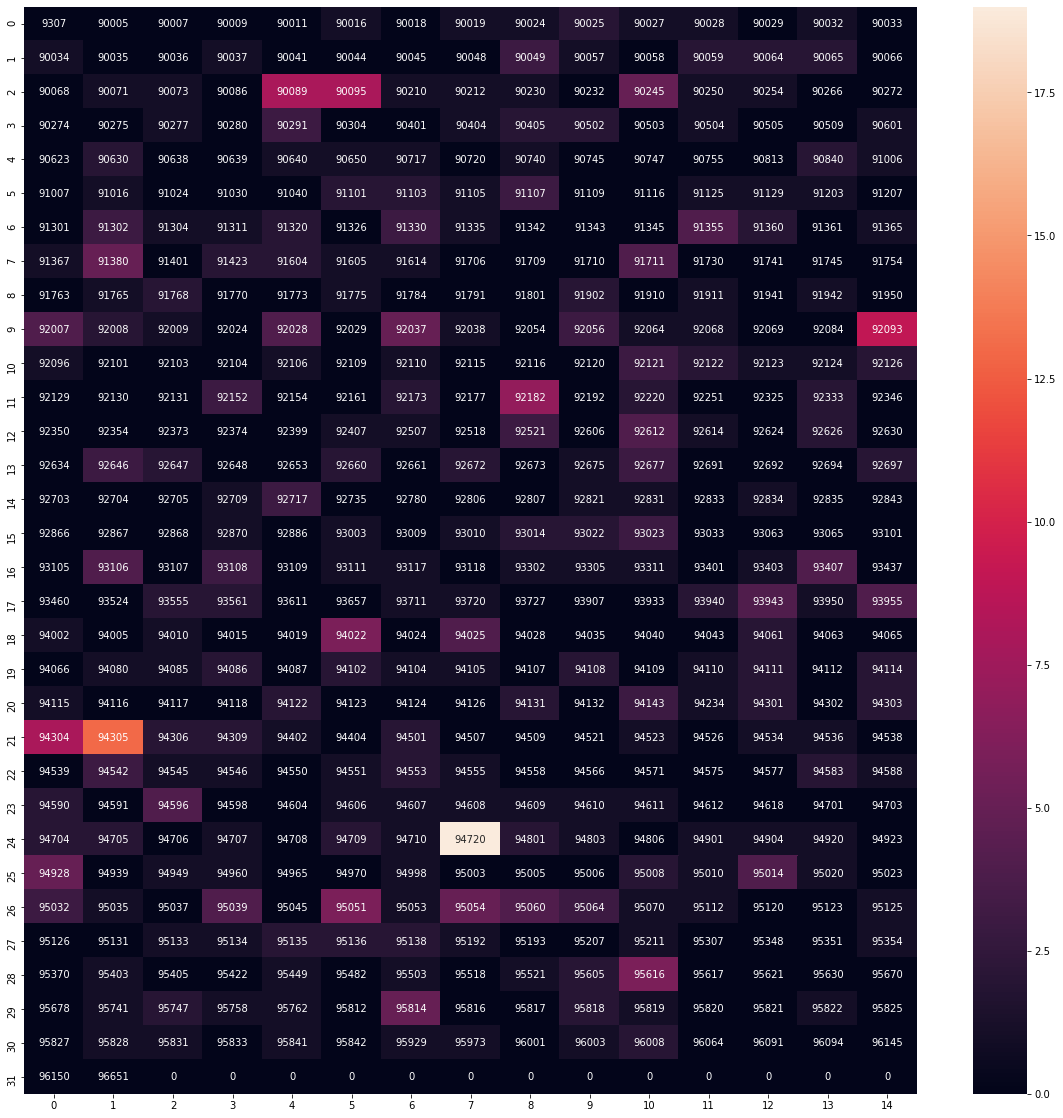

In [47]:
# Display the TOTAL # of customers in each ZIP code to accept Personal Loan offer
ZIP_Matrix_data = np.zeros((32, 15))
ZIP_Matrix_code = np.zeros((32, 15))
count = 0
for ii in range(0,32):
    for jj in range(0,15):
        ZIP_Matrix_data[ii][jj] = temp_sum.values[count]
        ZIP_Matrix_code[ii][jj] = temp_sum.index[count]
        count += 1
        if count == temp_sum.size:
            break
    if count == temp_sum.size:
        break
        
plt.figure(figsize=(20,20))
sns.heatmap(ZIP_Matrix_data, annot=ZIP_Matrix_code, fmt="g")
plt.show()

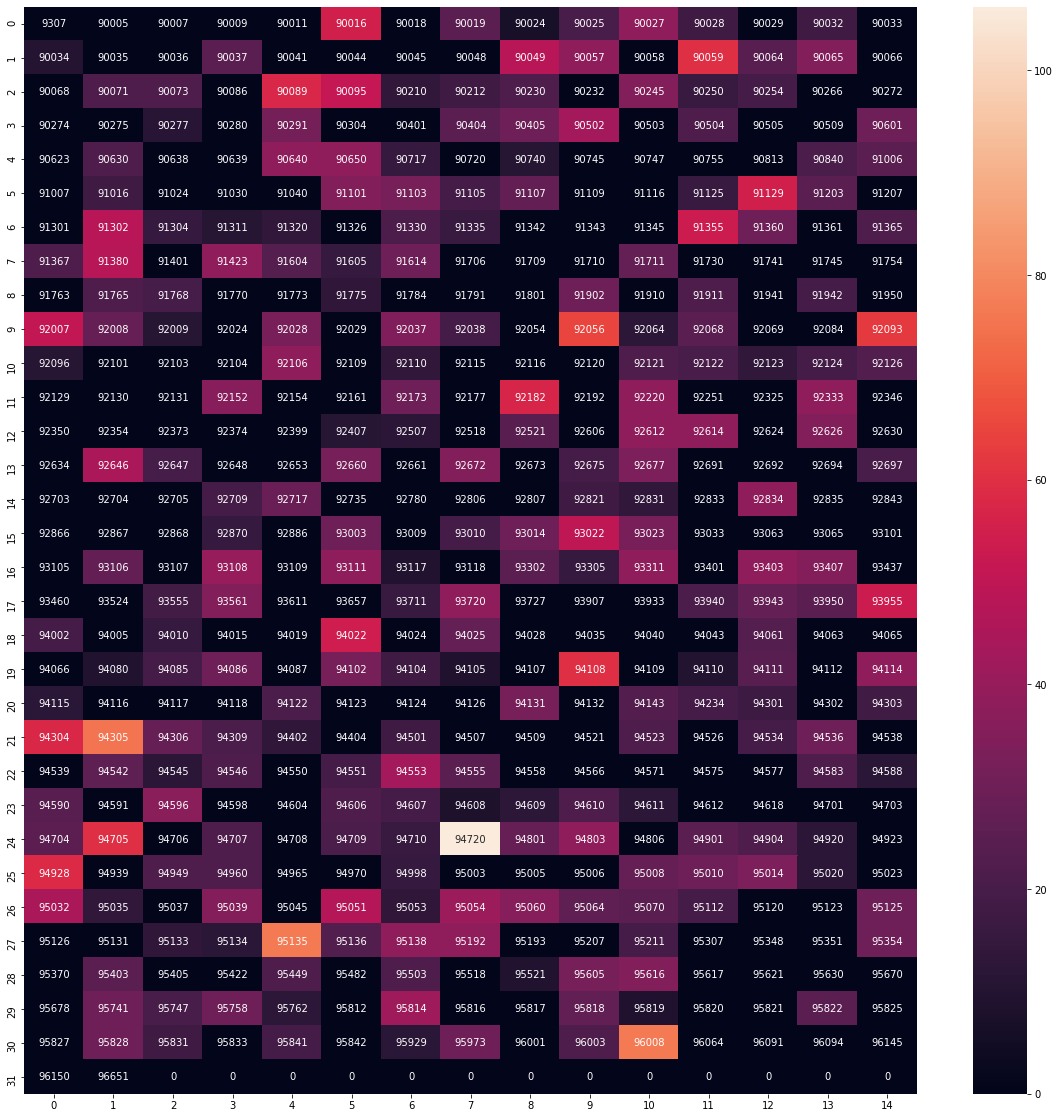

In [48]:
# Find way to Display the % of customers in each ZIP code to accept Personal Loan offer **AND**
# TOTAL # of customers to accept
#
# Current method = %Accepted + #Accepted*(5%)
#
ZIP_Matrix_data = np.zeros((32, 15))
ZIP_Matrix_code = np.zeros((32, 15))
count = 0
for ii in range(0,32):
    for jj in range(0,15):
        ZIP_Matrix_data[ii][jj] = 100.0*temp_sum.values[count]/temp_count.values[count]+5*temp_sum.values[count]
        ZIP_Matrix_code[ii][jj] = temp_sum.index[count]
        count += 1
        if count == temp_sum.size:
            break
    if count == temp_sum.size:
        break
        
plt.figure(figsize=(20,20))
sns.heatmap(ZIP_Matrix_data, annot=ZIP_Matrix_code, fmt="g")
plt.show()

### Insights

* Potentially Good indicators for Accepting a Personal Loan
 * Income (by itself)
 * Income vs. Average Credit Card Spending (marginally)
 * Income vs. Family Size
 * Income vs. Education
 * Has CD Account 
 
* Not likley to be inidcators for Accepting a Personal Loan
 * Work Experience
 * Mortgage 
 * Has Securities Account
 * Has Online Banking Account
 * Has Credit Card Account

* Adjusted rates of accepting Personal Loan via ZIP code info may be useful based on Heatmaps above - the last heat map essentially showing what ZIP codes are the "hottest" based on both acceptance % and total number accepted. Will need to investigate more later (and with other parameters)

### Get the data model ready

<AxesSubplot:xlabel='Age', ylabel='Experience'>

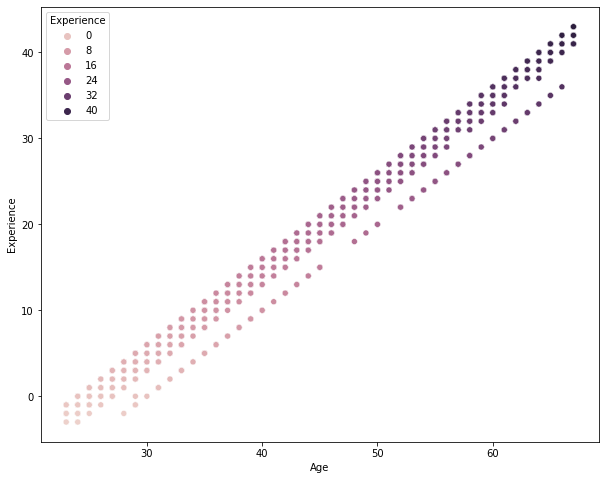

In [49]:
# Income vs. Work Experience (Yes/No Accepted Personal Loan)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Age', y='Experience',hue='Experience')

<AxesSubplot:xlabel='Personal Loan', ylabel='Experience'>

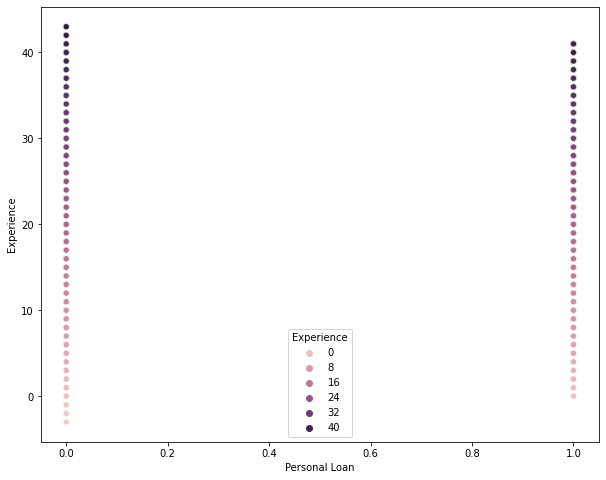

In [50]:
# Income vs. Work Experience (Yes/No Accepted Personal Loan)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data, x='Personal Loan', y='Experience',hue='Experience')

Data Issues Identifies
* Negative Experience entries (wrong?)
* One 4 digit ZIP code

As later analysis proves, neither of these two features are important because
* Experience is very linearly related to Age (redundant info)
* Nobody with negative Experience values accepted Loan offer, so their other parameters aren't useful for training model to predict folks who will accept.
* Only 1 ZIP code is entered incorrectly
* ZIP code is not very well correlated with Acceptance/non-Acceptance of the Personal Loan
* Both these columns removed from analysis via Recursive Feature Elimination (RFE) later in notebook

### 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [51]:
# Need to split off Personal Loan info - this is what we want to predict
X = data.drop('Personal Loan', axis=1)
Y = data[['Personal Loan']]

print(X.head())
print(Y.head())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  
   Personal Loan
0              0
1              0
2              0
3              0
4              0


In [52]:
print(X.shape)
print(Y.shape)

(5000, 13)
(5000, 1)


In [53]:
#X = X.values
#Y = Y.values

In [54]:
#split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7,stratify=Y)

### 4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [55]:
Y_train_1D = Y_train.values.ravel()

In [56]:
X_train

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2245,2246,54,28,33,94111,2,0.7,2,0,0,0,0,1
1698,1699,44,20,149,92121,1,1.7,1,0,0,0,1,0
4875,4876,61,36,54,94539,3,1.5,1,0,0,0,1,0
3250,3251,36,11,101,90212,3,1.2,3,0,1,0,0,1
2228,2229,48,23,43,90254,4,1.9,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4696,4697,59,35,70,92103,4,2.3,3,0,0,0,0,0
4560,4561,43,18,13,94709,2,0.1,2,0,0,1,1,1
2300,2301,66,41,70,93711,3,2.2,1,0,0,0,0,0
423,424,43,19,161,95616,2,7.5,1,0,0,0,0,0


### Try it based on method in Example Class Jupyter Notebooks first (use ALL features)

In [57]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train_1D)
Y_pred=model.predict(X_test)
Y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [58]:
# Accuracy Score
# (TP + TN) / (TP + FN + FP + TN)
accuracy_score(Y_test,Y_pred)

0.9

In [59]:
# Recall (or sensitivity) Score
# TP / (TP + FN)
recall_score(Y_test,Y_pred)

0.3194444444444444

In [60]:
# Precision Score
# TP / (TP + FP)
precision_score(Y_test,Y_pred)

0.46938775510204084

In [61]:
# F1 Score
# 2 * (Precision * Recall)/Precision + Recall
f1_score(Y_test,Y_pred)

0.3801652892561983

In [62]:
# ROC AUC Score
roc_auc_score(Y_test,Y_pred)

0.6405481809242871

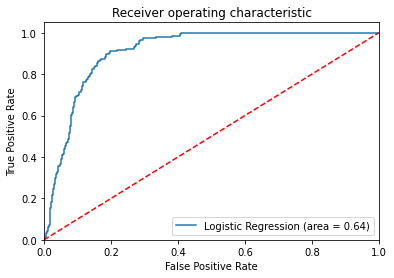

In [63]:
logit_roc_auc = roc_auc_score(Y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [64]:
Y_test_1D = Y_test.values.ravel()

In [65]:
Z = pd.DataFrame()                                               # creating a new dataframe
Z['Actual'] = Y_test_1D                                     # Storing actual output of target variable

Z['Probaility that output is 0'] = model.predict_proba(X_test)[:,0]
# Probabilities predicted by Logistic regression model
Z['Probaility that output is 1'] = model.predict_proba(X_test)[:,1]

Z['Predicted'] = model.predict(X_test)                               # Predicting target variable using sklearn Logistic regression

# In sklearn default threshold is 0.5
# therfore for all the values whose probability for 1 is greater than 0.5 will be predicted as 1

In [66]:
Z.head(15)

,Actual,Probaility that output is 0,Probaility that output is 1,Predicted
0,0,0.957898,0.042102,0
1,0,0.966216,0.033784,0
2,0,0.864282,0.135718,0
3,0,0.944602,0.055398,0
4,0,0.944146,0.055854,0
5,0,0.997337,0.002663,0
6,0,0.991084,0.008916,0
7,0,0.995478,0.004522,0
8,1,0.863670,0.136330,0
9,0,0.983579,0.016421,0


In [67]:
Z.tail(15)

,Actual,Probaility that output is 0,Probaility that output is 1,Predicted
1485,0,0.814275,0.185725,0
1486,0,0.967633,0.032367,0
1487,0,0.979982,0.020018,0
1488,0,0.992367,0.007633,0
1489,0,0.992944,0.007056,0
1490,0,0.984054,0.015946,0
1491,0,0.995958,0.004042,0
1492,0,0.994823,0.005177,0
1493,0,0.964900,0.035100,0
1494,0,0.996718,0.003282,0


In [68]:
# Heat map
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Predicted 0","Predicted 1"] , yticklabels = ["Actual 0","Actual 1"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

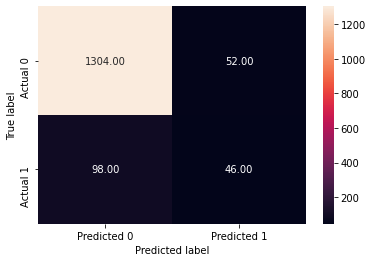

In [69]:
draw_cm( Z['Actual'], Z['Predicted'] )
# draw_cm( y_test, lr.predict(X_test) )

In [70]:
logit_model=sm.Logit(Y_test,X_test)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.139649
         Iterations 9
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.558      
Dependent Variable: Personal Loan    AIC:              444.9463   
Date:               2021-02-14 11:49 BIC:              514.0181   
No. Observations:   1500             Log-Likelihood:   -209.47    
Df Model:           12               LL-Null:          -474.31    
Df Residuals:       1487             LLR p-value:      1.0676e-105
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
ID                 -0.0001   0.0001 -0.6360 0.5247 -0.0002  0.0001
Age                -0.1906   0.1019 -1.8716 0.0613 -0

### Try with Recursive Feature Elimination

In [71]:
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=4)
rfe = rfe.fit(X_train,Y_train_1D)

print(rfe.support_)
print(rfe.ranking_)

[False False False  True False  True False  True False False  True False
 False]
[ 7  4  3  1  6  1  2  1  5  8  1 10  9]


In [72]:
col_names = X_train.columns
col_names[rfe.support_]

Index(['Income', 'Family', 'Education', 'CD Account'], dtype='object')

In [73]:
#Run with only columns above
model_rfe=LogisticRegression(max_iter=1000)
model_rfe.fit(X_train[col_names[rfe.support_]],Y_train_1D)
Y_pred_rfe=model_rfe.predict(X_test[col_names[rfe.support_]])

In [74]:
# Accuracy Score
# (TP + TN) / (TP + FN + FP + TN)
# No RFE applied = 0.9
accuracy_score(Y_test,Y_pred_rfe)

0.9426666666666667

In [75]:
# Recall (or sensitivity) Score
# TP / (TP + FN)
# No RFE applied = 0.3194444444444444
recall_score(Y_test,Y_pred_rfe)

0.5902777777777778

In [76]:
# Precision Score
# TP / (TP + FP)
# No RFE applied = 0.46938775510204084
precision_score(Y_test,Y_pred_rfe)

0.7589285714285714

In [77]:
# F1 Score
# 2 * (Precision * Recall)/Precision + Recall
# No RFE applied = 0.3801652892561983
f1_score(Y_test,Y_pred_rfe)

0.6640625

In [78]:
# ROC AUC Score
# No RFE applied = 0.6405481809242871
roc_auc_score(Y_test,Y_pred_rfe)

0.7851831366764995

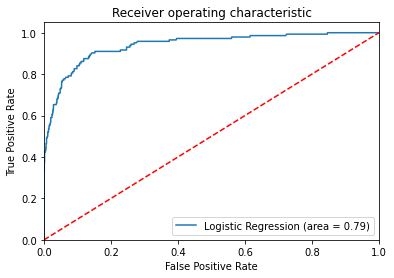

In [79]:
logit_roc_auc = roc_auc_score(Y_test, model_rfe.predict(X_test[col_names[rfe.support_]]))
fpr, tpr, thresholds = roc_curve(Y_test, model_rfe.predict_proba(X_test[col_names[rfe.support_]])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [80]:
Z_rfe = pd.DataFrame()                                               # creating a new dataframe
Z_rfe['Actual'] = Y_test_1D                                     # Storing actual output of target variable

Z_rfe['Probaility that output is 0'] = model_rfe.predict_proba(X_test[col_names[rfe.support_]])[:,0]
# Probabilities predicted by Logistic regression model
Z_rfe['Probaility that output is 1'] = model_rfe.predict_proba(X_test[col_names[rfe.support_]])[:,1]

Z_rfe['Predicted'] = model_rfe.predict(X_test[col_names[rfe.support_]])                               # Predicting target variable using sklearn Logistic regression

# In sklearn default threshold is 0.5
# therfore for all the values whose probability for 1 is greater than 0.5 will be predicted as 1

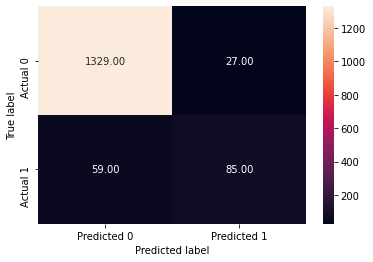

In [81]:
# Heat map for model with RFE (Only 4 features used - ['Income', 'Family', 'Education', 'CD Account'])
draw_cm( Z_rfe['Actual'], Z_rfe['Predicted'] )
# draw_cm( y_test, lr.predict(X_test) )

In [82]:
logit_model=sm.Logit(Y_test,X_test[col_names[rfe.support_]])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.339204
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.073   
Dependent Variable: Personal Loan    AIC:              1025.6113
Date:               2021-02-14 11:49 BIC:              1046.8641
No. Observations:   1500             Log-Likelihood:   -508.81  
Df Model:           3                LL-Null:          -474.31  
Df Residuals:       1496             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Income        0.0055    0.0012   4.4385  0.0000   0.0031   0.0080
Family       -0.6255    0.0698  -8.9584  0.0000  -0.7624  -0.4887
Educatio

### Try with creating a feature based on Family and Education 

If Income is greater than $75K
* Convert all Family <= 2 to 0 & Family >= 3 to 1
* Convert all Education == 1 to 0 & Education >= 2 to 1

In [83]:
# Tests with Simple IF/Else Statements

Z_if = pd.DataFrame()                                               # creating a new dataframe
Z_if['Actual'] = Y_test_1D                                     # Storing actual output of target variable
Z_if['Predicted'] = Y_test_1D 

for ii in range(0,len(Y_test_1D)):
    if X_test['Income'].loc[X_test.index[ii]] > 75:
        if X_test['Family'].loc[X_test.index[ii]] > 2.9 or X_test['Education'].loc[X_test.index[ii]] > 1.9:
            Z_if['Predicted'].loc[ii] = 1                             # Predicting target variable using if statements
        else:
            Z_if['Predicted'].loc[ii] = 0                             # Predicting target variable using if statements
    else:
        Z_if['Predicted'].loc[ii] = 0                             # Predicting target variable using if statements

# In sklearn default threshold is 0.5
# therfore for all the values whose probability for 1 is greater than 0.5 will be predicted as 1

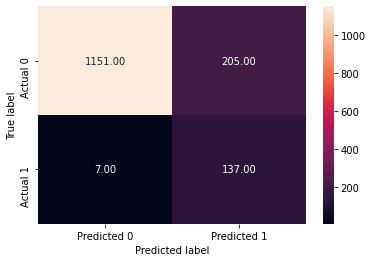

In [84]:
# Heat map for model with IF statements (Only 3 features used - ['Income', Family', 'Education'])
draw_cm( Z_if['Actual'], Z_if['Predicted'] )
# draw_cm( y_test, lr.predict(X_test) )

* Above shows that it is theoretically possible to eliminate MOST False Negatives (FN)

In [85]:
# Let's see if changing the Family/Education data to 1's and 0's can help the Logistic Regression Tools
X_train_copy = X_train.copy()
Y_train_copy = Y_train.copy()
Y_train_copy_1D = Y_train_copy.values.ravel()

X_test_copy = X_test.copy()
Y_test_copy = Y_test.copy()
Y_test_copy_1D = Y_test_copy.values.ravel()

In [86]:
# Adjust X_train
X_train_copy['FamEdu'] = Y_train_copy_1D
for ii in range(0,len(X_train_copy)):
    if X_train_copy['Income'].loc[X_train_copy.index[ii]] > 75:
        if X_train_copy['Family'].loc[X_train_copy.index[ii]] > 2.9 or X_train_copy['Education'].loc[X_train_copy.index[ii]] > 1.9:
            X_train_copy.loc[X_train_copy.index[ii],'FamEdu'] = 1
        else:
            X_train_copy.loc[X_train_copy.index[ii],'FamEdu'] = 0 
    else:
        X_train_copy.loc[X_train_copy.index[ii],'FamEdu'] = 0 
            
X_train_copy

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,FamEdu
2245,2246,54,28,33,94111,2,0.7,2,0,0,0,0,1,0
1698,1699,44,20,149,92121,1,1.7,1,0,0,0,1,0,0
4875,4876,61,36,54,94539,3,1.5,1,0,0,0,1,0,0
3250,3251,36,11,101,90212,3,1.2,3,0,1,0,0,1,1
2228,2229,48,23,43,90254,4,1.9,3,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4696,4697,59,35,70,92103,4,2.3,3,0,0,0,0,0,0
4560,4561,43,18,13,94709,2,0.1,2,0,0,1,1,1,0
2300,2301,66,41,70,93711,3,2.2,1,0,0,0,0,0,0
423,424,43,19,161,95616,2,7.5,1,0,0,0,0,0,0


In [87]:
# Adjust X_test
X_test_copy['FamEdu'] = Y_test_copy_1D
for ii in range(0,len(X_test_copy)):
    if X_test_copy['Income'].loc[X_test_copy.index[ii]] > 75:
        if X_test_copy['Family'].loc[X_test_copy.index[ii]] > 2.9 or X_test_copy['Education'].loc[X_test_copy.index[ii]] > 1.9:
            X_test_copy.loc[X_test_copy.index[ii],'FamEdu'] = 1
        else:
            X_test_copy.loc[X_test_copy.index[ii],'FamEdu'] = 0 
    else:
        X_test_copy.loc[X_test_copy.index[ii],'FamEdu'] = 0         
            
X_test_copy

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,FamEdu
3621,3622,53,27,81,91730,3,1.7,2,193,0,0,1,0,1
4440,4441,43,19,75,90041,3,0.3,3,0,0,0,0,0,0
1905,1906,25,-1,112,92507,2,2.0,1,241,0,0,1,0,0
3068,3069,56,26,90,92120,2,4.5,3,0,0,0,0,0,1
486,487,55,30,84,92173,2,3.7,1,304,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,2932,31,4,54,91741,2,1.0,2,109,0,0,0,1,0
4858,4859,50,24,62,94550,2,0.8,3,0,0,0,1,0,0
785,786,46,22,164,94122,2,7.6,1,0,0,1,1,1,0
1351,1352,59,35,84,94588,1,1.8,3,0,0,0,1,1,1


In [88]:
col_names_2 = ['Income', 'FamEdu']

#Run with only columns above
model_if=LogisticRegression(max_iter=1000)
model_if.fit(X_train_copy[col_names_2],Y_train_copy_1D)
#Y_pred_if=model_if.predict(X_test_copy[col_names_2])
Y_pred_if=(model_if.predict_proba(X_test_copy[col_names_2])[:,1] >= 0.1).astype(bool) # set threshold as 0.1

In [89]:
# Accuracy Score
# (TP + TN) / (TP + FN + FP + TN)
# No RFE applied = 0.9
accuracy_score(Y_test_copy,Y_pred_if)

0.9126666666666666

In [90]:
# Recall (or sensitivity) Score
# TP / (TP + FN)
# No RFE applied = 0.3194444444444444
recall_score(Y_test_copy,Y_pred_if)

0.9097222222222222

In [91]:
# Precision Score
# TP / (TP + FP)
# No RFE applied = 0.46938775510204084
precision_score(Y_test_copy,Y_pred_if)

0.5261044176706827

In [92]:
# F1 Score
# 2 * (Precision * Recall)/(Precision + Recall)
# No RFE applied = 0.3801652892561983
f1_score(Y_test_copy,Y_pred_if)

0.6666666666666666

In [93]:
# ROC AUC Score
# No RFE applied = 0.6405481809242871
roc_auc_score(Y_test_copy,Y_pred_if)

0.9113507866273354

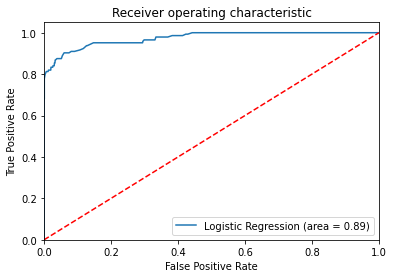

In [94]:
logit_roc_auc = roc_auc_score(Y_test_copy, model_if.predict(X_test_copy[col_names_2]))
fpr, tpr, thresholds = roc_curve(Y_test_copy, model_if.predict_proba(X_test_copy[col_names_2])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [97]:
Z_if = pd.DataFrame()                                               # creating a new dataframe
Z_if['Actual'] = Y_test_copy_1D                                     # Storing actual output of target variable

Z_if['Probaility that output is 0'] = model_if.predict_proba(X_test_copy[col_names_2])[:,0] 
# Probabilities predicted by Logistic regression model
Z_if['Probaility that output is 1'] = model_if.predict_proba(X_test_copy[col_names_2])[:,1]

Z_if['Predicted'] = (model_if.predict_proba(X_test_copy[col_names_2])[:,1] >= 0.1).astype(int) # set threshold as 0.1                               # Predicting target variable using sklearn Logistic regression

#for ii in range(0,len(Z_if)):
#    if Z_if['Predicted'].loc[Z_if.index[ii]]:
#        Z_if.loc[Z_if.index[ii],'Predicted'] = 1
#    else:
#        Z_if.loc[Z_if.index[ii],'Predicted'] = 0

# In sklearn default threshold is 0.5, but we changed it to 0.1
# therfore for all the values whose probability for 1 is greater than 0.1 will be predicted as 1

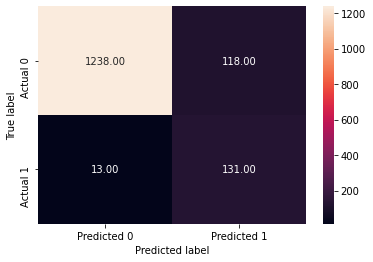

In [98]:
# Heat map for model with IF statements (Only 3 features used - ['Income', Family', 'Education'])
draw_cm( Z_if['Actual'], Z_if['Predicted'] )
# draw_cm( y_test, lr.predict(X_test) )

In [99]:
logit_model=sm.Logit(Y_test_copy,X_test_copy[col_names_2])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.448440
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.418   
Dependent Variable: Personal Loan    AIC:              1349.3197
Date:               2021-02-14 12:04 BIC:              1359.9462
No. Observations:   1500             Log-Likelihood:   -672.66  
Df Model:           1                LL-Null:          -474.31  
Df Residuals:       1498             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Income      -0.0317    0.0017  -19.0088  0.0000  -0.0350  -0.0284
FamEdu       2.9557    0.2060   14.3499  0.0000   2.5520   3.3594



* Recall is the most important score, since we are not as concerned with False Positives (FP) as we are with False Negatives
* Recall went from ~30% to ~60% to ~90% with further and further feature elimination and feature refinement 
 * First there was feature elimiation (going from ALL features to just income, family size, education type, and CD account
 * Second we added another feature associated with Income level, Family size, and Education type - it was composed of 0's and 1's 
 * Third we reduced the threshold level to further increase the Recall
* Precision and Accuracy took a hit in the later stages, but it is ok to send out offers to a few more people if we are able to show that we increase the number of people who will accept the offer

### 5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

#### Coefficients for non-RFE and RFE results

In [100]:
## Feature Importance or Coefficients for non-RFE Result
fi = pd.DataFrame()
fi['Col'] = col_names
fi['Coeff'] = np.round(abs(model.coef_[0]),10)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
3,Income,0.038767
6,CCAvg,0.000994
8,Mortgage,0.000348
7,Education,0.000267
1,Age,0.000236
2,Experience,0.000228
5,Family,0.000152
10,CD Account,0.000146
4,ZIP Code,0.000067
0,ID,0.000055


In [101]:
## Feature Importance or Coefficients for RFE Result
fi = pd.DataFrame()
fi['Col'] = col_names[rfe.support_]
fi['Coeff'] = np.round(abs(model_rfe.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
3,CD Account,2.47
2,Education,1.73
1,Family,0.61
0,Income,0.06


In [102]:
## Feature Importance or Coefficients for RFE Result
fi = pd.DataFrame()
fi['Col'] = col_names_2
fi['Coeff'] = np.round(abs(model_if.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
1,FamEdu,6.54
0,Income,0.07


#### Locations of Mis-matches between Predicted and Actual Observed classes (for FINAL model)

In [103]:
Z_idx_temp = []
X_idx_temp = []
for ii in range(0,len(Z_if)):
    if Z_if['Actual'][Z_if.index[ii]] != Z_if['Predicted'][Z_if.index[ii]]:
        Z_idx_temp.append(Z_if.index[ii])
        X_idx_temp.append(X_test_copy.index[ii])
print(Z_idx_temp)
print('')
print(X_idx_temp)

[3, 13, 15, 19, 32, 53, 87, 92, 104, 107, 128, 143, 149, 155, 163, 168, 175, 191, 196, 209, 221, 223, 227, 235, 236, 241, 247, 251, 255, 274, 290, 306, 333, 342, 354, 380, 413, 434, 439, 440, 450, 457, 465, 473, 484, 497, 519, 529, 539, 563, 566, 572, 610, 622, 648, 652, 673, 681, 685, 692, 712, 730, 732, 759, 781, 785, 799, 814, 845, 852, 854, 857, 863, 869, 874, 921, 938, 957, 962, 979, 986, 993, 999, 1000, 1008, 1022, 1050, 1061, 1077, 1078, 1087, 1088, 1098, 1099, 1102, 1123, 1137, 1140, 1147, 1158, 1179, 1189, 1194, 1200, 1218, 1226, 1227, 1230, 1243, 1245, 1257, 1264, 1275, 1278, 1280, 1286, 1298, 1300, 1308, 1326, 1330, 1333, 1355, 1373, 1408, 1415, 1425, 1456, 1458, 1480, 1484]

[3068, 4984, 3879, 1145, 3804, 3426, 2625, 505, 1067, 4492, 2982, 3459, 3747, 4125, 3350, 236, 367, 4184, 3650, 4604, 3483, 412, 3771, 951, 1871, 2040, 4042, 4009, 2952, 1471, 3351, 3980, 2534, 1614, 4578, 3610, 3637, 185, 4083, 2140, 3002, 2049, 3274, 2988, 998, 740, 4327, 1967, 1509, 1179, 4963, 4697,

In [104]:
Z_if.loc[Z_idx_temp]

,Actual,Probaility that output is 0,Probaility that output is 1,Predicted
3,0,0.877871,0.122129,1
13,0,0.803043,0.196957,1
15,0,0.767241,0.232759,1
19,0,0.791592,0.208408,1
32,0,0.622412,0.377588,1
...,...,...,...,...
1425,1,0.999966,0.000034,0
1456,0,0.567443,0.432557,1
1458,1,0.999877,0.000123,0
1480,0,0.892273,0.107727,1


In [105]:
# Test data (missing Personal Loan column) where there was a mis-match between Predicted & Actual Loan Acceptance
X_test_copy.loc[X_idx_temp]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,FamEdu
3068,3069,56,26,90,92120,2,4.5,3,0,0,0,0,0,1
4984,4985,27,1,98,94043,4,2.3,3,0,0,0,0,1,1
3879,3880,28,4,101,95136,3,2.5,1,270,0,0,0,0,1
1145,1146,32,6,99,92101,2,1.5,3,0,0,0,0,1,1
3804,3805,47,22,203,95842,2,8.8,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,1578,34,8,65,92093,1,3.0,1,227,0,0,1,0,0
3234,3235,37,12,114,91107,3,0.6,2,0,0,0,1,0,1
4583,4584,52,26,83,92521,1,3.1,1,0,0,0,1,0,0
4764,4765,56,32,88,95051,4,1.0,2,0,0,0,1,1,1


In [106]:
# Data where there was a mis-match between Predicted & Actual Loan Acceptance
data.loc[X_idx_temp]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3068,3069,56,26,90,92120,2,4.5,3,0,0,0,0,0,0
4984,4985,27,1,98,94043,4,2.3,3,0,0,0,0,0,1
3879,3880,28,4,101,95136,3,2.5,1,270,0,0,0,0,0
1145,1146,32,6,99,92101,2,1.5,3,0,0,0,0,0,1
3804,3805,47,22,203,95842,2,8.8,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,1578,34,8,65,92093,1,3.0,1,227,1,0,0,1,0
3234,3235,37,12,114,91107,3,0.6,2,0,0,0,0,1,0
4583,4584,52,26,83,92521,1,3.1,1,0,1,0,0,1,0
4764,4765,56,32,88,95051,4,1.0,2,0,0,0,0,1,1


### 6. Give conclusion related to the Business understanding of your model? (5 marks)

##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted that customer will be offered a Personal Loan and will Accept AND did accept

*False Positive (observed=0,predicted=1):*

Predicted that customer will be offered a Personal Loan and will Accept, BUT they did NOT Accept (or would not have)

*True Negative (observed=0,predicted=0):*

Predicted that customer will be offered a Personal Loan and will NOT Accept AND they did NOT accept

*False Negative (observed=1,predicted=0):*

Predicted that customer will be offered a Personal Loan and will NOT Accept, BUT they did accept (or would have)

##### `Important Features`

'Income', 'Family Size', 'Education', 'Has CD Account w/ Bank' 

seems to be top 4 features which influence the model's output. Based on the RFE exercise.

'Has Online Banking w/ Bank', 'Has Credit Card w/ Bank', 'Has Securities Account w/ Bank', 'ZIP Code' 

have lower ranks according to the RFE exercise so these feature do NOT help model in predicting target variable.


##### `Important Metric`

Here the bank wants to determine a better marketing scheme to increase the success of a future Personal Loan offer campain to its liability customers (with minimal budget). So the idea is to find an algorithm to predict the group of customers that are most likely to accept, while minimizing the number of offers send out (to keep costs low) 

Here the bank wants to minimize the the total number of personal loan offers sent out (to reduce budget), while capturing at least all the people who would potentially accept i.e. **less number of False Negative**, if FN is high bank would lose customers that may have accepted the personal loan offer. Conversely, False Positives are ok, but should be minimized. Hence **Recall is the important metric** and really ought to be 100% - by reducing the number of features to the 4 most important ones, we increased the recall by ~2x (from ~32% to ~59%). Further reduction of the number features and refinement of the Income, Family Size and Education Type into one new feature allowed us to increase the Recall to over 90%.

In case of False positive bank will send out a few too many offers but that okay because the bank would want to retain add more customers at the cost of sending out a little more offers.

After achieving the desired recall we can deploy the model for practical use. As in the bank now can predict who is most likely to accept a personal loan (if offered).